<a href="https://colab.research.google.com/github/bikashkrgupta/self-driving-car/blob/master/Traffic_Signs/traffic_signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pickle
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
help(open)

Help on built-in function open in module io:

open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
    Open file and return a stream.  Raise IOError upon failure.
    
    file is either a text or byte string giving the name (and the path
    if the file isn't in the current working directory) of the file to
    be opened or an integer file descriptor of the file to be
    wrapped. (If a file descriptor is given, it is closed when the
    returned I/O object is closed, unless closefd is set to False.)
    
    mode is an optional string that specifies the mode in which the file
    is opened. It defaults to 'r' which means open for reading in text
    mode.  Other common values are 'w' for writing (truncating the file if
    it already exists), 'x' for creating and writing to a new file, and
    'a' for appending (which on some Unix systems, means that all writes
    append to the end of the file regardless of the current seek position

In [0]:
with open('german-traffic-signs/train.p','rb') as f:  # open for reading files exist in binary mode
  train_data=pickle.load(f)      # this way  unpickle the data
  
with open('german-traffic-signs/test.p','rb') as f:  # open for reading files exist in binary mode
  test_data=pickle.load(f)
  
with open('german-traffic-signs/valid.p','rb') as f:  # open for reading files exist in binary mode
  valid_data=pickle.load(f)

x_train,y_train = train_data['features'],train_data['labels']
x_test,y_test = test_data['features'],test_data['labels']
x_val,y_val = valid_data['features'],valid_data['labels']



In [0]:
print(x_train.shape)

(34799, 32, 32, 3)


In [0]:
assert(x_train.shape[0]==y_train.shape[0]),'The number of images is not equal to labels'
assert(x_test.shape[0]==y_test.shape[0]),'The number of images is not equal to labels'
assert(x_val.shape[0]==y_val.shape[0]),'The number of images is not equal to labels'

assert(x_train.shape[1:]==(32,32,3)),'the images are not 32X32X3'
assert(x_test.shape[1:]==(32,32,3)),'the images are not 32X32X3'
assert(x_val.shape[1:]==(32,32,3)),'the images are not 32X32X3'

In [0]:
data=pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [0]:
print(len(data))

43


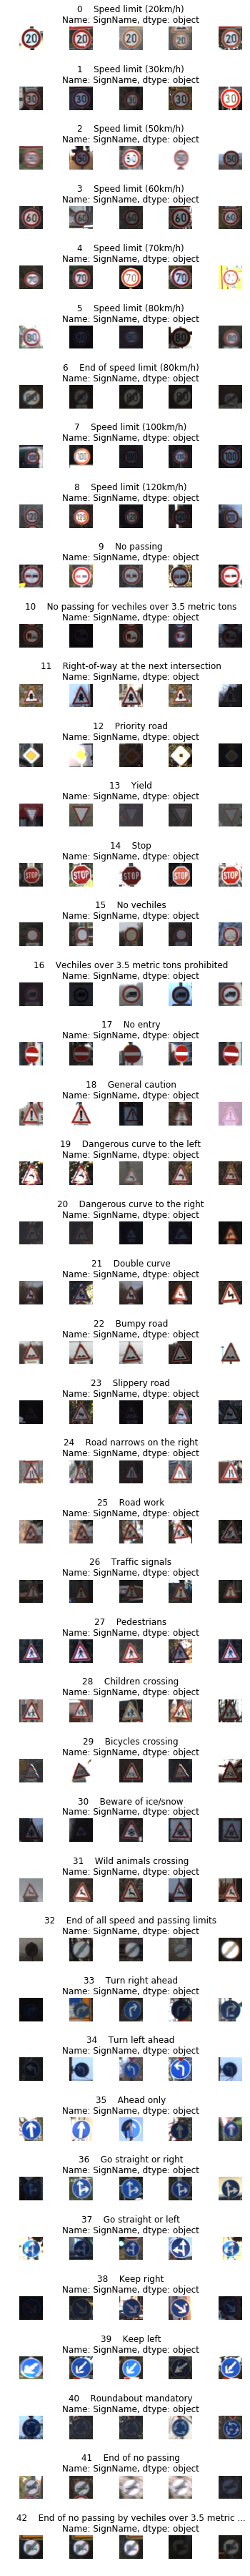

In [0]:
n_samples=[]
n_cols = 5
n_classes = 43

fig,axes = plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(5,50))
fig.tight_layout()

for i in range(n_cols):
  for j in range(n_classes):
    x_selected = x_train[y_train==j]
    axes[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:,:])
    axes[j][i].axis('off')
    
    if i==2:
      axes[j][i].set_title(str(data.SignName[data.ClassId==j]))
      n_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


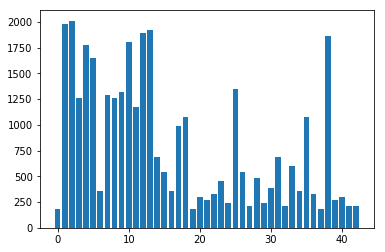

In [0]:
print(n_samples)
plt.bar(range(n_classes),n_samples)
plt.show()


(32, 32, 3)


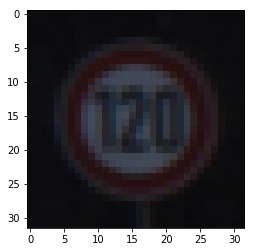

In [0]:
import cv2

print(x_train[random.randint(0,(len(x_train))-1)].shape)
plt.imshow(x_train[random.randint(0,(len(x_train))-1)])
plt.show()

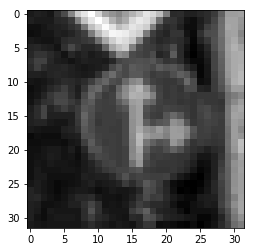

In [0]:
def grayscale(image):
  gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  return gray

plt.imshow(grayscale(x_train[1000]),cmap='gray')
plt.show()

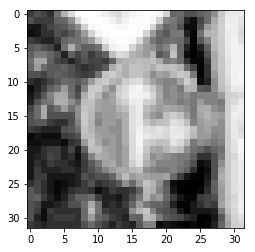

(32, 32)


In [0]:
def equalize(image):
  equalised=cv2.equalizeHist(image)
  return equalised

img=equalize(grayscale(x_train[1000]))
plt.imshow(img,cmap='gray')
plt.show()
print(img.shape)

In [0]:
def preprocessing(image):
  image=grayscale(image)
  image=equalize(image)
  image=image/255
  return image

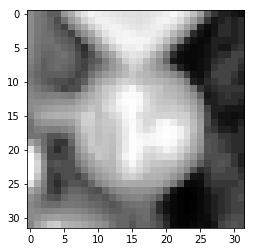

In [0]:
x_train = np.array(list(map(preprocessing,x_train)))
x_test = np.array(list(map(preprocessing,x_test)))
x_val = np.array(list(map(preprocessing,x_val)))
# to check if applied or not
plt.imshow(x_train[1200],cmap='gray')
plt.show()


In [0]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(34799, 32, 32)
(12630, 32, 32)
(4410, 32, 32)


CNN

In [0]:
x_train=x_train.reshape(34799, 32, 32,1)
x_test=x_test.reshape(12630, 32, 32,1)
x_val=x_val.reshape(4410, 32, 32,1)

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_val=to_categorical(y_val)

In [0]:
def lenet_model():
  
  model= Sequential()
   
  model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
  model.add(Conv2D(60,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes,activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

# lenet_model
# nvidia_model

In [0]:
model=lenet_model()
print(model.summary())

W0621 09:46:23.454969 140163483617152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 09:46:23.491299 140163483617152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 09:46:23.498879 140163483617152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0621 09:46:23.536271 140163483617152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0621 09:46:23.563527 140163483617152 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 30)          0         
__________

In [0]:
h=model.fit(x_train,y_train,verbose=1,epochs=10,batch_size=20,shuffle=True,validation_data=(x_val,y_val))

W0621 09:46:23.787070 140163483617152 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 17s 490us/step - loss: 1.0672 - acc: 0.6938 - val_loss: 0.2155 - val_acc: 0.9469
Epoch 2/10
34799/34799 [==============================] - 10s 293us/step - loss: 0.3081 - acc: 0.9052 - val_loss: 0.1698 - val_acc: 0.9476
Epoch 3/10
34799/34799 [==============================] - 10s 292us/step - loss: 0.2188 - acc: 0.9338 - val_loss: 0.1057 - val_acc: 0.9698
Epoch 4/10
34799/34799 [==============================] - 10s 293us/step - loss: 0.1729 - acc: 0.9449 - val_loss: 0.0793 - val_acc: 0.9794
Epoch 5/10
34799/34799 [==============================] - 10s 293us/step - loss: 0.1451 - acc: 0.9547 - val_loss: 0.0750 - val_acc: 0.9785
Epoch 6/10
34799/34799 [==============================] - 10s 297us/step - loss: 0.1326 - acc: 0.9595 - val_loss: 0.0792 - val_acc: 0.9782
Epoch 7/10
34799/34799 [==============================] - 10s 293us/step - loss: 0.1230 - acc: 0.9624 - val_loss: 0.0

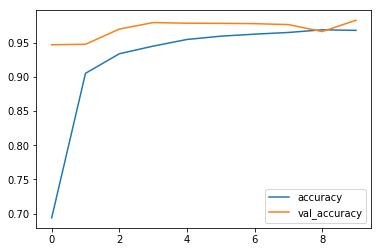

In [0]:
plt.plot(h.history['acc'],label='accuracy')
plt.plot(h.history['val_acc'],label='val_accuracy')
plt.legend()
plt.show()

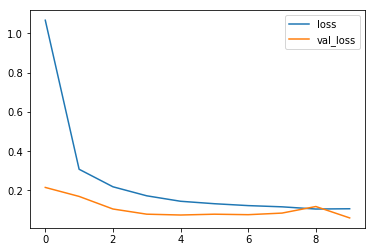

In [0]:
plt.plot(h.history['loss'],label='loss')
plt.plot(h.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [0]:
model.save('lenet.h5')

In [0]:
from google.colab import files
files.download('lenet.h5')